In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import yticks

# Data Exploration

## Load the dataset using Pandas.

In [34]:
cars_df=pd.read_csv('/Users/Bilal/PycharmProjects/LearningAI/Files/project_1/train.csv')

## Display basic information: .shape, .columns, .info(), .describe().

In [3]:
cars_df.shape

(19237, 18)

In [4]:
cars_df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='str')

In [5]:
cars_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  str    
 3   Manufacturer      19237 non-null  str    
 4   Model             19237 non-null  str    
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  str    
 7   Leather interior  19237 non-null  str    
 8   Fuel type         19237 non-null  str    
 9   Engine volume     19237 non-null  str    
 10  Mileage           19237 non-null  str    
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  str    
 13  Drive wheels      19237 non-null  str    
 14  Doors             19237 non-null  str    
 15  Wheel             19237 non-null  str    
 16  Color             19237 non-null  str    
 17  Airb

In [6]:
cars_df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## Check for missing values and handle them (.fillna() or .dropna() with justification).

In [18]:
cars_df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## Print unique values for categorical columns like fuelType, transmission, make.

In [19]:
cars_df["Fuel type"].unique()

<StringArray>
['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG', 'Hydrogen']
Length: 7, dtype: str

In [22]:
cars_df["Manufacturer"].unique()

<StringArray>
[        'LEXUS',     'CHEVROLET',         'HONDA',          'FORD',
       'HYUNDAI',        'TOYOTA', 'MERCEDES-BENZ',          'OPEL',
       'PORSCHE',           'BMW',          'JEEP',    'VOLKSWAGEN',
          'AUDI',       'RENAULT',        'NISSAN',        'SUBARU',
        'DAEWOO',           'KIA',    'MITSUBISHI',     'SSANGYONG',
         'MAZDA',           'GMC',          'FIAT',      'INFINITI',
    'ALFA ROMEO',        'SUZUKI',         'ACURA',       'LINCOLN',
           'VAZ',           'GAZ',       'CITROEN',    'LAND ROVER',
          'MINI',         'DODGE',      'CHRYSLER',        'JAGUAR',
         'ISUZU',         'SKODA',      'DAIHATSU',         'BUICK',
         'TESLA',      'CADILLAC',       'PEUGEOT',       'BENTLEY',
         'VOLVO',          'სხვა',         'HAVAL',        'HUMMER',
         'SCION',           'UAZ',       'MERCURY',           'ZAZ',
         'ROVER',          'SEAT',        'LANCIA',      'MOSKVICH',
      'MASERATI',   

In [23]:
cars_df["Cylinders"].unique()

array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

#  Data Cleaning

## Convert all string-based numerical columns (like "Price", "Odometer") into proper integers/floats.

In [24]:
cars_df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [25]:
cars_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  str    
 3   Manufacturer      19237 non-null  str    
 4   Model             19237 non-null  str    
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  str    
 7   Leather interior  19237 non-null  str    
 8   Fuel type         19237 non-null  str    
 9   Engine volume     19237 non-null  str    
 10  Mileage           19237 non-null  str    
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  str    
 13  Drive wheels      19237 non-null  str    
 14  Doors             19237 non-null  str    
 15  Wheel             19237 non-null  str    
 16  Color             19237 non-null  str    
 17  Airb

In [35]:
#engine_volume, mileage


cars_df['Engine volume']=cars_df["Engine volume"].str.split(" ").str[0].astype(float)

In [36]:
cars_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  str    
 3   Manufacturer      19237 non-null  str    
 4   Model             19237 non-null  str    
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  str    
 7   Leather interior  19237 non-null  str    
 8   Fuel type         19237 non-null  str    
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  str    
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  str    
 13  Drive wheels      19237 non-null  str    
 14  Doors             19237 non-null  str    
 15  Wheel             19237 non-null  str    
 16  Color             19237 non-null  str    
 17  Airb

In [37]:
cars_df['Mileage']=cars_df["Mileage"].str.split(" ").str[0].astype(float).astype(int)

In [63]:
cars_df.rename(columns={"Mileage":"Mileage KM"},inplace=True)

In [64]:
cars_df.info()


<class 'pandas.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  str    
 3   Manufacturer      18924 non-null  str    
 4   Model             18924 non-null  str    
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  str    
 7   Leather interior  18924 non-null  str    
 8   Fuel type         18924 non-null  str    
 9   Engine volume     18924 non-null  float64
 10  Mileage KM        18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  str    
 13  Drive wheels      18924 non-null  str    
 14  Doors             18924 non-null  str    
 15  Wheel             18924 non-null  str    
 16  Color             18924 non-null  str    
 17  Airbags  

## Standardize categorical columns (e.g., lowercase all values in make).

In [43]:
cars_df['Manufacturer']=cars_df['Manufacturer'].str.lower()

In [44]:
cars_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,lexus,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,chevrolet,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,honda,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,ford,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,honda,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Remove duplicates if any.

In [48]:
cars_df=cars_df.drop_duplicates()

In [49]:
cars_df.info()

<class 'pandas.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  str    
 3   Manufacturer      18924 non-null  str    
 4   Model             18924 non-null  str    
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  str    
 7   Leather interior  18924 non-null  str    
 8   Fuel type         18924 non-null  str    
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  str    
 13  Drive wheels      18924 non-null  str    
 14  Doors             18924 non-null  str    
 15  Wheel             18924 non-null  str    
 16  Color             18924 non-null  str    
 17  Airbags  

# Data Analysis

## Find the average car price by make (brand).

In [50]:
cars_df.groupby("Manufacturer")["Price"].mean()

Manufacturer
acura             5910.933333
alfa romeo        9890.250000
aston martin     54000.000000
audi             14047.255906
bentley         197574.500000
                    ...      
vaz               4659.893617
volkswagen       11471.774081
volvo            10278.894737
zaz               3822.500000
სხვა             17248.500000
Name: Price, Length: 65, dtype: float64

## Find the most expensive brand and least expensive brand on average.

In [61]:
cars_df.groupby("Manufacturer")["Price"].mean().idxmax()

'lamborghini'

In [62]:
cars_df.groupby("Manufacturer")["Price"].mean().idxmin()

'rolls-royce'

## Group cars by fuelType and show the average price and mileage.

In [65]:
cars_df.groupby("Fuel type")[["Mileage KM","Price"]].mean()

,Mileage KM,Price
Fuel type,,
CNG,2.352272e+07,8186.859275
Diesel,7.166572e+05,30684.792802
Hybrid,4.753292e+05,10845.476688
Hydrogen,1.168000e+05,20385.000000
LPG,2.722707e+05,13320.505085
Petrol,1.367728e+06,17391.153459
Plug-in Hybrid,1.226019e+05,23650.917647


## Which transmission type (manual vs automatic) tends to cost more?

In [67]:
cars_df["Gear box type"].unique()

<StringArray>
['Automatic', 'Tiptronic', 'Variator', 'Manual']
Length: 4, dtype: str

In [69]:
cars_df.groupby("Gear box type")["Price"].mean()

Gear box type
Automatic    16004.732495
Manual       25865.434924
Tiptronic    26313.582708
Variator     14770.497954
Name: Price, dtype: float64

### Manual costs more

## Use NumPy to compute:
* Maximum price
* Minimum price
* Median price


In [146]:
cars_df["Mileage KM"].describe()

count    1.892400e+04
mean     1.555373e+06
std      4.880221e+07
min      0.000000e+00
25%      7.019575e+04
50%      1.264000e+05
75%      1.891198e+05
max      2.147484e+09
Name: Mileage KM, dtype: float64

In [113]:
price_array= np.array(cars_df["Price"])

In [82]:
price_array.max()

np.int64(26307500)

In [83]:
price_array.min()

np.int64(1)

In [84]:
price_array.mean()

np.float64(18587.435267385332)

# Visualization

## Create histograms for Price and Odometer.

In [153]:
np.log10(1)


np.float64(0.0)

In [90]:
price_array

array([13328, 16621,  8467, ..., 26108,  5331,   470], shape=(18924,))

Text(0.5, 1.0, 'Price Histogram')

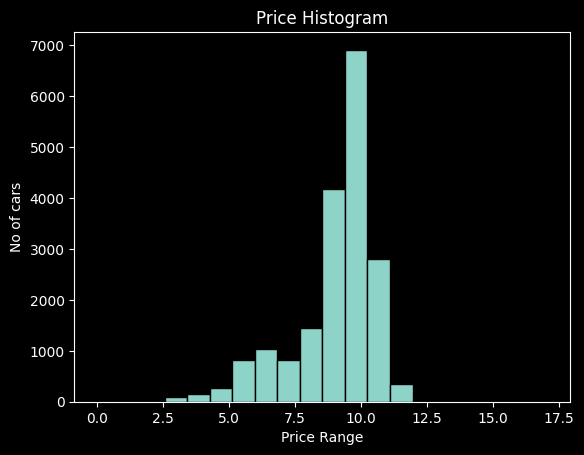

In [145]:
plt.hist(np.log(price_array),bins=20,edgecolor="black")
plt.xlabel("Price Range")
plt.ylabel("No of cars")
plt.title("Price Histogram")


Text(0.5, 1.0, 'Price Histogram')

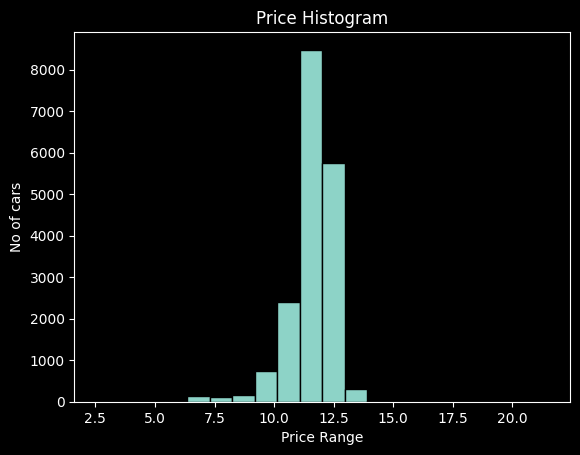

In [152]:
mileage_array= np.array(cars_df["Mileage KM"])
mask=(mileage_array>0)
mileage_array=mileage_array[mask]

plt.hist(np.log(mileage_array),bins=20,edgecolor="black")
plt.xlabel("Price Range")
plt.ylabel("No of cars")
plt.title("Price Histogram")


## Create a bar chart showing average car price per brand (top 10 brands only).

In [163]:
distribution=cars_df.groupby("Manufacturer")["Price"].mean()
top_10=distribution.iloc[0:11]
top_10

Manufacturer
acura             5910.933333
alfa romeo        9890.250000
aston martin     54000.000000
audi             14047.255906
bentley         197574.500000
bmw              20609.468147
buick            11074.375000
cadillac         13514.500000
chevrolet        14894.873926
chrysler          8631.538462
citroen          10640.444444
Name: Price, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

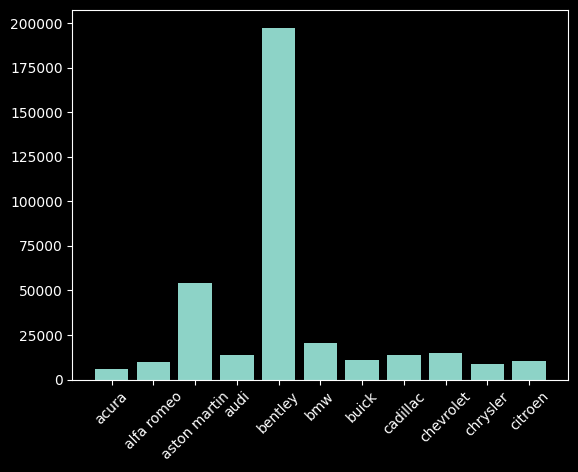

In [168]:
array_top_10_price=np.array(top_10.values)
array_top_10_manufacturers=np.array(top_10.index)
plt.bar(array_top_10_manufacturers,array_top_10_price)
plt.xticks(rotation=45)
plt.tight_layout

## Create a scatter plot of Mileage vs Price.

In [170]:
mileage_array

array([186005, 192000, 200000, ..., 116365,  51258, 186923],
      shape=(18210,))

In [171]:
price_array

array([13328, 16621,  8467, ..., 26108,  5331,   470], shape=(18924,))

In [176]:
price_array= np.array(cars_df["Price"])
mask=(price_array<260000)
price_array=price_array[mask]
price_array = np.interp(
    np.linspace(0, len(price_array)-1, 18924),
    np.arange(len(price_array)),
    price_array
)
price_array

array([13328.        , 16619.60783174,  8473.89446705, ...,
       26090.43238386,  5328.94493474,   470.        ], shape=(18924,))

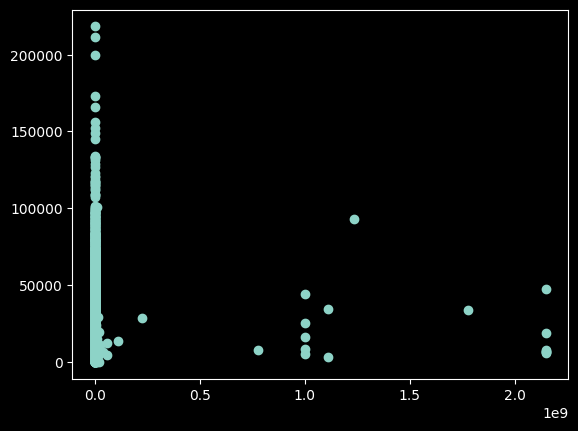

In [177]:
mileage_array= np.array(cars_df["Mileage KM"])
plt.scatter(mileage_array,price_array)